In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from data import fetch_yfinance_data


stock = "OKYO"
daily_df, minute_df = fetch_yfinance_data(stock, "2025-06-21")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

2025-06-20 07:40:00 2025-06-20 19:52:00


In [3]:
import pandas as pd
minute_df['plot_date'] = pd.to_datetime(minute_df['date']).dt.tz_localize(None)
# print(minute_df.head())
# Filter for June 20th only
start_date = pd.to_datetime("2025-06-18").date()    
end_date = pd.to_datetime("2025-06-20").date()
# print(target_date)
mask = (minute_df['plot_date'].dt.date >= start_date) & (minute_df['plot_date'].dt.date <= end_date)
day_df = minute_df[mask]
print(day_df['plot_date'].min(), day_df['plot_date'].max())

day_df.tail()


2025-06-18 09:30:00 2025-06-20 19:52:00


Price,date,open,high,low,close,volume,averageWAP,barCount,plot_date
Ticker,,OKYO,OKYO,OKYO,OKYO,OKYO,,,
677,2025-06-20 18:37:00-04:00,2.4300,2.4300,2.4300,2.4300,0,None,None,2025-06-20 18:37:00
678,2025-06-20 18:56:00-04:00,2.4289,2.4289,2.4289,2.4289,0,None,None,2025-06-20 18:56:00
679,2025-06-20 19:46:00-04:00,2.4187,2.4187,2.4187,2.4187,0,None,None,2025-06-20 19:46:00
680,2025-06-20 19:51:00-04:00,2.3500,2.3511,2.3500,2.3511,0,None,None,2025-06-20 19:51:00
681,2025-06-20 19:52:00-04:00,2.3600,2.3600,2.3500,2.3500,0,None,None,2025-06-20 19:52:00


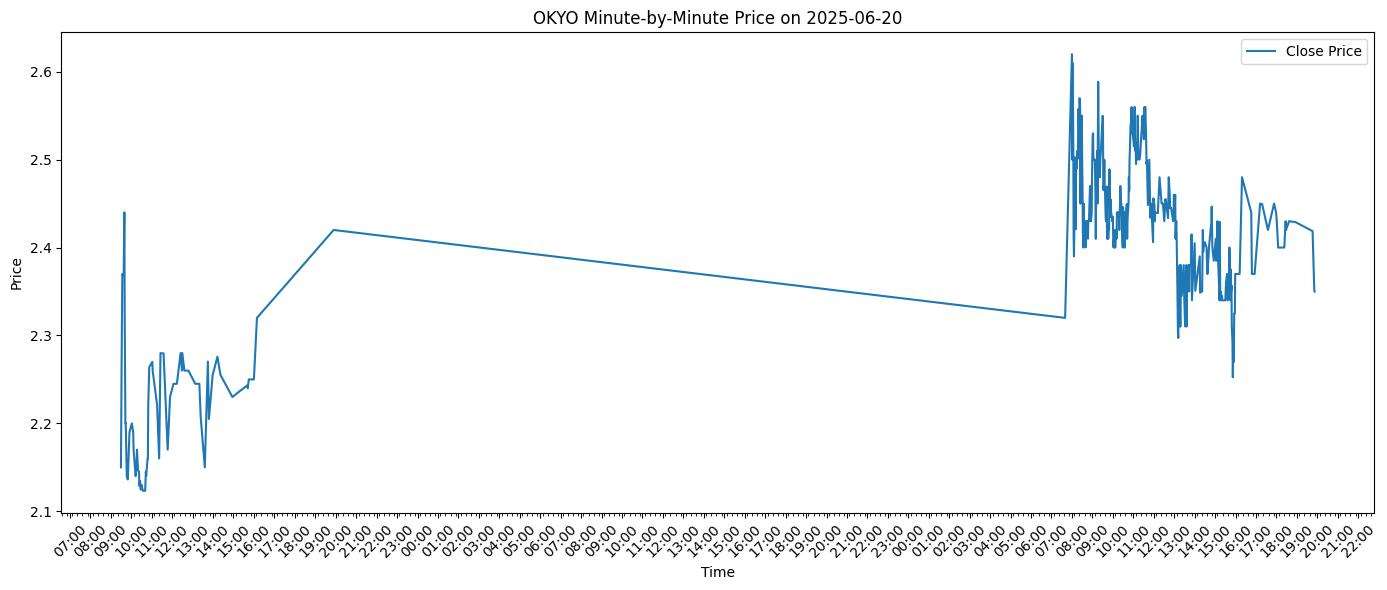

In [5]:

plt.figure(figsize=(14, 6))
plt.plot(day_df['plot_date'], day_df['close'], label='Close Price')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f"{stock} Minute-by-Minute Price on 2025-06-20")

# Format x-axis for time of day
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

/tmp/ipykernel_464/1065997229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['volume_change'] = day_df['volume'].diff().fillna(0)


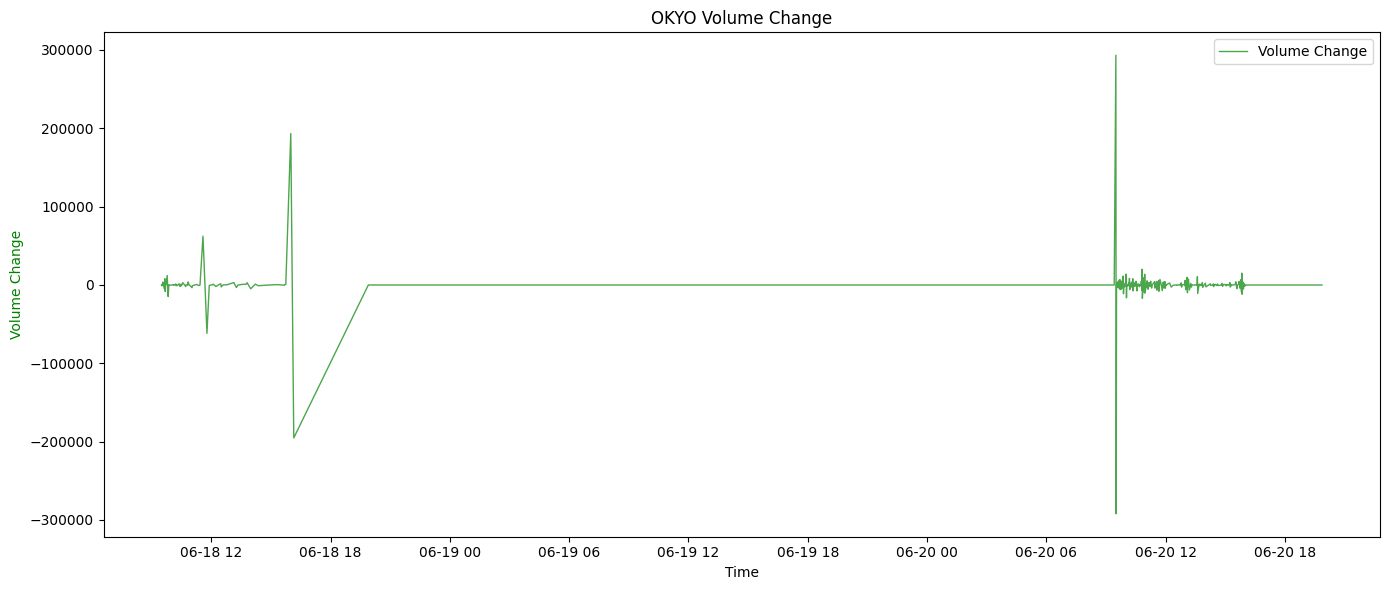

In [4]:
day_df['volume_change'] = day_df['volume'].diff().fillna(0)
plt.figure(figsize=(14, 6))
plt.plot(
    day_df['plot_date'], 
    day_df['volume_change'], 
    color='green', 
    label='Volume Change',
    linewidth=1.0,
    alpha=0.7
)
plt.ylabel('Volume Change', color='green')
plt.xlabel('Time')
plt.title(f"{stock} Volume Change")
plt.legend()
plt.tight_layout()
plt.show()